In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
!pip install apyori

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5955 sha256=7748b87da11c2230ea9e63c3a93e5ca74c6ec338609987a0b74518c9c4a6309d
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\32\2a\54\10c595515f385f3726642b10c60bf788029e8f3a1323e3913a
Successfully built apyori


In [16]:
pip install mlxtend

     ---------------------------------------- 1.4/1.4 MB 1.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
sales_df = pd.read_csv("dataset_group.csv")
display(sales_df.head())


,Date,Order_id,Product
0,01-01-2018,1,yogurt
1,01-01-2018,1,pork
2,01-01-2018,1,sandwich bags
3,01-01-2018,1,lunch meat
4,01-01-2018,1,all- purpose


## Data Info 

In [4]:
display(sales_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20641 entries, 0 to 20640
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      20641 non-null  object
 1   Order_id  20641 non-null  int64 
 2   Product   20641 non-null  object
dtypes: int64(1), object(2)
memory usage: 483.9+ KB


None

## Data Summary

In [11]:
sales_df.describe(include = 'all')


,Date,Order_id,Product
count,20641,20641.000000,20641
unique,603,NaN,37
top,08-02-2019,NaN,poultry
freq,183,NaN,640
mean,NaN,575.986289,NaN
std,NaN,328.557078,NaN
min,NaN,1.000000,NaN
25%,NaN,292.000000,NaN
50%,NaN,581.000000,NaN
75%,NaN,862.000000,NaN


In [4]:
sales_df.nunique()

Date         603
Order_id    1139
Product       37
dtype: int64

In [5]:
display(sales_df.isna().sum())


Date        0
Order_id    0
Product     0
dtype: int64

In [7]:
sales_df.duplicated().sum()

4730

In [9]:
sales_df[sales_df.duplicated()]

,Date,Order_id,Product
10,01-01-2018,1,all- purpose
13,01-01-2018,1,all- purpose
18,01-01-2018,1,dinner rolls
29,01-01-2018,2,waffles
31,01-01-2018,2,hand soap
...,...,...,...
20616,24-02-2020,1137,paper towels
20632,25-02-2020,1138,sandwich bags
20633,25-02-2020,1138,toilet paper
20635,25-02-2020,1138,soda


EDA

<AxesSubplot:>

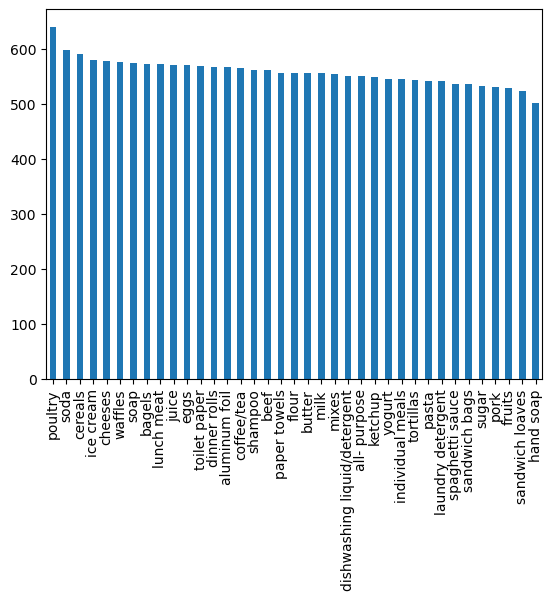

In [8]:
sales_df.Product.value_counts().plot(kind='bar')

In [23]:
sales_df.groupby('Order_id')['Order_id'].count().sort_values(ascending=False)

Order_id
226     34
957     34
1013    34
1071    34
10      33
        ..
243      4
1114     4
523      4
408      3
1139     3
Name: Order_id, Length: 1139, dtype: int64

#### MBA in Python



In [3]:
basket=sales_df.groupby(['Order_id', 'Product'])['Product'].count().unstack().reset_index().fillna(0).set_index('Order_id')

In [4]:
def encode_zero_one(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [5]:
basket=basket.applymap(encode_zero_one)

In [6]:
basket.head()

Product,all- purpose,aluminum foil,bagels,beef,butter,cereals,cheeses,coffee/tea,dinner rolls,dishwashing liquid/detergent,...,sandwich loaves,shampoo,soap,soda,spaghetti sauce,sugar,toilet paper,tortillas,waffles,yogurt
Order_id,,,,,,,,,,,,,,,,,,,,,
1,1,1,0,1,1,0,0,0,1,0,...,0,1,1,1,0,0,0,0,0,1
2,0,1,0,0,0,1,1,0,0,1,...,0,1,0,0,0,0,1,1,1,1
3,0,0,1,0,0,1,1,0,1,0,...,1,1,1,1,1,0,1,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
5,1,0,0,0,0,0,0,0,1,0,...,1,0,0,1,1,0,1,1,1,1


In [6]:
itemsets = apriori(basket, min_support = 0.01,use_colnames = True, low_memory=True)


C:\Users\Dell\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [7]:
itemsets

,support,itemsets
0,0.374890,(all- purpose)
1,0.384548,(aluminum foil)
2,0.385426,(bagels)
3,0.374890,(beef)
4,0.367867,(butter)
...,...,...
610567,0.010536,"(spaghetti sauce, pork, ketchup, soda, mixes, ..."
610568,0.011414,"(spaghetti sauce, ketchup, soda, mixes, waffle..."
610569,0.010536,"(laundry detergent, shampoo, poultry, soap, so..."
610570,0.011414,"(shampoo, milk, poultry, yogurt, mixes, sandwi..."


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


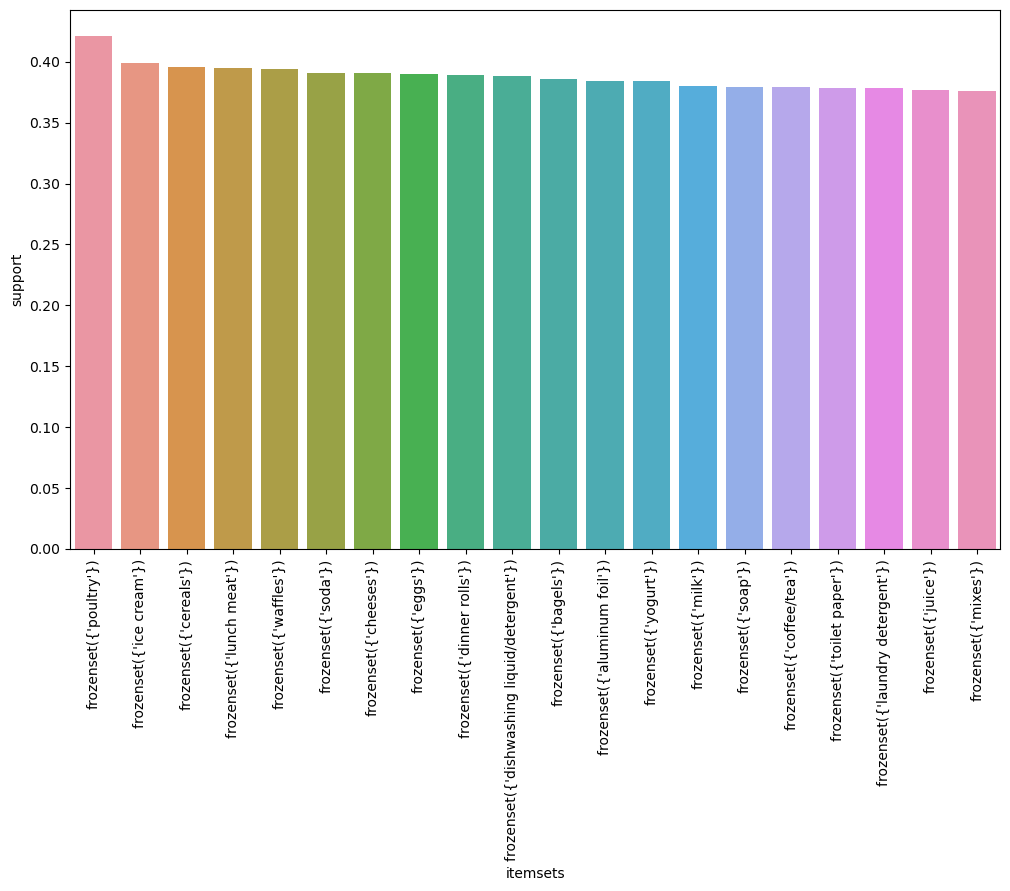

In [9]:
plt.figure(figsize=(12,7))
sns.barplot(itemsets.sort_values('support',ascending=False).iloc[0:20,1],
            itemsets.sort_values('support',ascending=False).iloc[0:20,0])
plt.xticks(rotation=90)
plt.show()

In [7]:
basket = association_rules(itemsets, metric ="lift") 


In [8]:
basket = basket.sort_values(['lift','confidence'], ascending =[False, False]) 

In [9]:
basket

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
21916480,"(ketchup, sugar, sandwich bags, all- purpose)","(laundry detergent, soap, flour)",0.023705,0.058824,0.011414,0.481481,8.185185,0.010019,1.815126,0.899142
21916501,"(laundry detergent, soap, flour)","(ketchup, sugar, sandwich bags, all- purpose)",0.058824,0.023705,0.011414,0.194030,8.185185,0.010019,1.211329,0.932692
21907007,"(coffee/tea, fruits, all- purpose, toilet paper)","(butter, beef, cereals)",0.022827,0.058824,0.010536,0.461538,7.846154,0.009193,1.747899,0.892932
21907074,"(butter, beef, cereals)","(coffee/tea, fruits, all- purpose, toilet paper)",0.058824,0.022827,0.010536,0.179104,7.846154,0.009193,1.190374,0.927083
22026356,"(milk, ice cream, individual meals, pork)","(shampoo, sandwich loaves, cereals)",0.020193,0.067603,0.010536,0.521739,7.717674,0.009170,1.949557,0.888366
...,...,...,...,...,...,...,...,...,...,...
7172681,"(cereals, cheeses)","(poultry, sugar, tortillas)",0.174715,0.081651,0.011414,0.065327,0.800076,-0.002852,0.982535,-0.232412
194853,"(aluminum foil, individual meals)","(ketchup, dishwashing liquid/detergent)",0.162423,0.155399,0.020193,0.124324,0.800031,-0.005047,0.964513,-0.229835
947940,"(yogurt, toilet paper)","(mixes, pork)",0.162423,0.155399,0.020193,0.124324,0.800031,-0.005047,0.964513,-0.229835
194852,"(ketchup, dishwashing liquid/detergent)","(aluminum foil, individual meals)",0.155399,0.162423,0.020193,0.129944,0.800031,-0.005047,0.962669,-0.228360


In [10]:
basket = basket.sort_values(['confidence'], ascending =[True]) 

In [11]:
basket

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
14073472,(poultry),"(laundry detergent, mixes, butter, aluminum fo...",0.421422,0.014047,0.010536,0.025,1.779687,0.004616,1.011233,0.757208
15763533,(poultry),"(bagels, soap, shampoo, ice cream, cheeses)",0.421422,0.014925,0.010536,0.025,1.675000,0.004246,1.010333,0.696510
15779404,(poultry),"(bagels, soap, laundry detergent, soda, cheeses)",0.421422,0.014925,0.010536,0.025,1.675000,0.004246,1.010333,0.696510
14068388,(poultry),"(hand soap, laundry detergent, butter, aluminu...",0.421422,0.016681,0.010536,0.025,1.498684,0.003506,1.008532,0.575114
15785791,(poultry),"(bagels, shampoo, milk, soda, cheeses)",0.421422,0.014925,0.010536,0.025,1.675000,0.004246,1.010333,0.696510
...,...,...,...,...,...,...,...,...,...,...
22045458,"(coffee/tea, lunch meat, waffles, sandwich loa...",(soap),0.010536,0.379280,0.010536,1.000,2.636574,0.006540,inf,0.627329
22045581,"(sandwich bags, yogurt, milk, poultry, pasta, ...",(coffee/tea),0.010536,0.379280,0.010536,1.000,2.636574,0.006540,inf,0.627329
16476169,"(beef, fruits, cereals, hand soap, eggs)",(milk),0.010536,0.380158,0.010536,1.000,2.630485,0.006530,inf,0.626442
13415849,"(all- purpose, paper towels, milk, ketchup, su...",(soap),0.010536,0.379280,0.010536,1.000,2.636574,0.006540,inf,0.627329


In [12]:
basket = association_rules(itemsets, metric ="lift") 
basket = basket.sort_values(['lift','confidence'], ascending =[True, True]) 

In [13]:
basket

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
24439,"(ice cream, coffee/tea)",(laundry detergent),0.165057,0.378402,0.052678,0.319149,0.843412,-0.009780,0.912972,-0.181912
24442,(laundry detergent),"(ice cream, coffee/tea)",0.378402,0.165057,0.052678,0.139211,0.843412,-0.009780,0.969974,-0.229988
34223,(pork),"(ice cream, fruits)",0.355575,0.165057,0.050922,0.143210,0.867639,-0.007768,0.974501,-0.191415
34218,"(ice cream, fruits)",(pork),0.165057,0.355575,0.050922,0.308511,0.867639,-0.007768,0.931938,-0.154485
46755,(waffles),"(tortillas, poultry)",0.394205,0.171203,0.058824,0.149220,0.871601,-0.008666,0.974162,-0.195608
...,...,...,...,...,...,...,...,...,...,...
47855,"(dinner rolls, paper towels)","(pasta, eggs)",0.155399,0.169447,0.051800,0.333333,1.967185,0.025468,1.245830,0.582121
47953,"(eggs, paper towels)","(ice cream, pasta)",0.165935,0.167691,0.055312,0.333333,1.987784,0.027486,1.248464,0.595789
47948,"(ice cream, pasta)","(eggs, paper towels)",0.167691,0.165935,0.055312,0.329843,1.987784,0.027486,1.244581,0.597046
47949,"(ice cream, eggs)","(pasta, paper towels)",0.166813,0.164179,0.055312,0.331579,2.019617,0.027924,1.250441,0.605934
